In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

In [2]:
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df = pd.read_csv('data/breast-cancer-wisconsin.data', names=names)

In [3]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
df.drop(['id'],axis=1,inplace=True)

In [6]:
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [7]:
df.columns

Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   clump_thickness         699 non-null    int64 
 1   uniform_cell_size       699 non-null    int64 
 2   uniform_cell_shape      699 non-null    int64 
 3   marginal_adhesion       699 non-null    int64 
 4   single_epithelial_size  699 non-null    int64 
 5   bare_nuclei             699 non-null    object
 6   bland_chromatin         699 non-null    int64 
 7   normal_nucleoli         699 non-null    int64 
 8   mitoses                 699 non-null    int64 
 9   class                   699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [9]:
df['bare_nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [10]:
df[df['bare_nuclei'] == '?']

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [11]:
df4=df[df['class'] == 4 ]
df4=df4[df4['bare_nuclei'] !='?' ]
df4


,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
5,8,10,10,8,7,10,9,7,1,4
12,5,3,3,3,2,3,4,4,1,4
14,8,7,5,10,7,9,5,5,4,4
15,7,4,6,4,6,1,4,3,1,4
18,10,7,7,6,4,10,4,1,2,4
...,...,...,...,...,...,...,...,...,...,...
681,5,10,10,10,4,10,5,6,3,4
691,5,10,10,5,4,5,4,4,1,4
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [12]:
#df4['class'].value_counts()

In [13]:
#df4['bare_nuclei']=df4['bare_nuclei'].astype('int64')
#som=df4['bare_nuclei'].sum()
#som=som/239
#som

In [14]:
df4['bare_nuclei']=df4['bare_nuclei'].astype('int64')
moy4=df4['bare_nuclei'].mean()
moy4

7.627615062761507

In [15]:
df.loc[(df['class']== 4) & (df['bare_nuclei'] =='?'), 'bare_nuclei'] = moy4

In [16]:
df['bare_nuclei'][23]

7.627615062761507

In [17]:
df2=df[df['class'] == 2 ]
df2=df2[df2['bare_nuclei'] !='?' ]
df2


,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
690,1,1,1,3,2,1,1,1,1,2
692,3,1,1,1,2,1,1,1,1,2
693,3,1,1,1,2,1,2,1,2,2
694,3,1,1,1,3,2,1,1,1,2


In [18]:
df2['bare_nuclei']=df2['bare_nuclei'].astype('int64')
moy2=df2['bare_nuclei'].mean()
moy2

1.3468468468468469

In [19]:
df.loc[(df['class']== 2) & (df['bare_nuclei'] =='?'), 'bare_nuclei'] = moy2

In [20]:
df['bare_nuclei'][40]

1.3468468468468469

In [21]:
df.isna().sum()

clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [22]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   clump_thickness         699 non-null    int64
 1   uniform_cell_size       699 non-null    int64
 2   uniform_cell_shape      699 non-null    int64
 3   marginal_adhesion       699 non-null    int64
 4   single_epithelial_size  699 non-null    int64
 5   bare_nuclei             699 non-null    int64
 6   bland_chromatin         699 non-null    int64
 7   normal_nucleoli         699 non-null    int64
 8   mitoses                 699 non-null    int64
 9   class                   699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [24]:
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.503577,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.624325,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [25]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

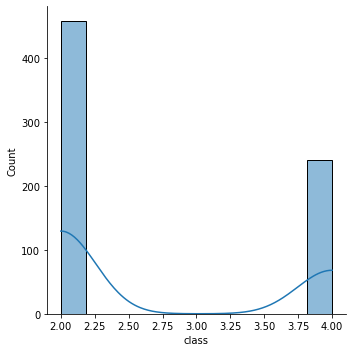

In [26]:
sns.displot(df['class'],kde=True)

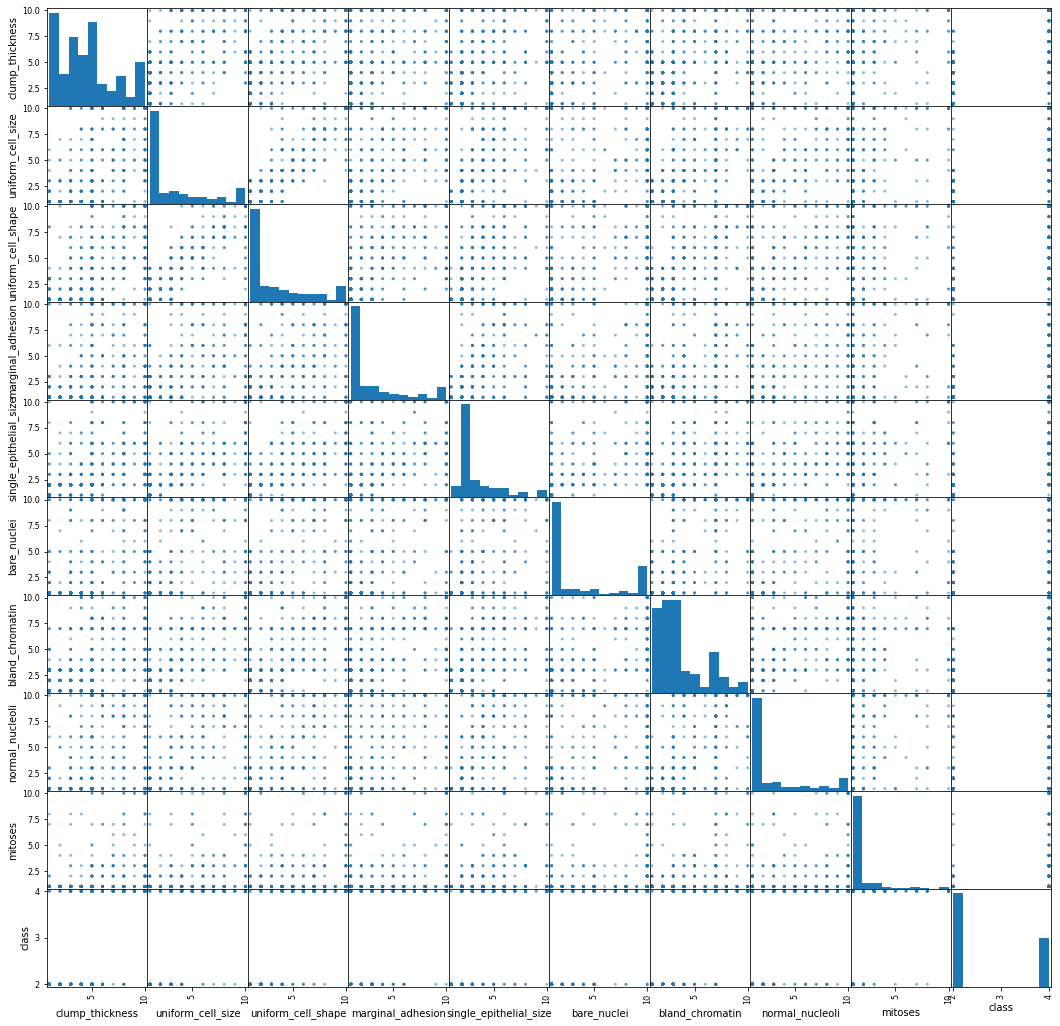

In [27]:
scatter_matrix(df, figsize = (18,18))
plt.show()

<AxesSubplot:>

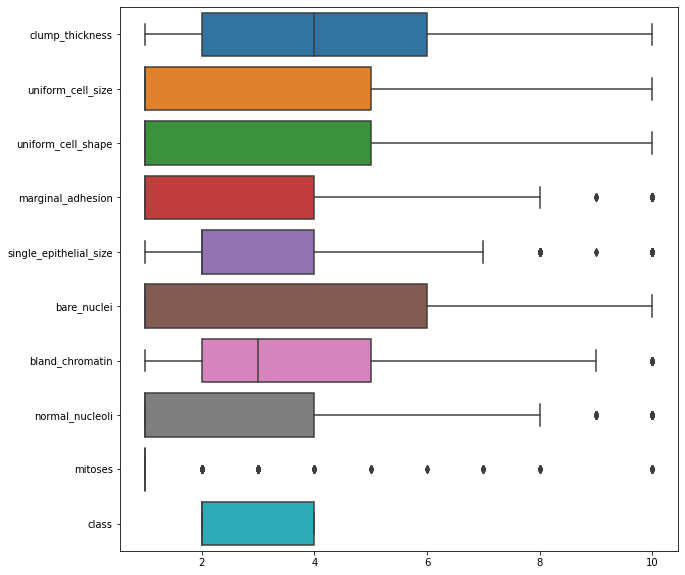

In [28]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')

In [29]:
df.corr()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.595653,0.558428,0.535835,0.350034,0.716001
uniform_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.690673,0.755721,0.722865,0.458693,0.817904
uniform_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.712261,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.663528,0.666715,0.603352,0.417633,0.696800
single_epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.580711,0.616102,0.628881,0.479101,0.682785
bare_nuclei,0.595653,0.690673,0.712261,0.663528,0.580711,1.000000,0.679726,0.580042,0.340541,0.824961
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.679726,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.580042,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.340541,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.824961,0.756616,0.712244,0.423170,1.000000


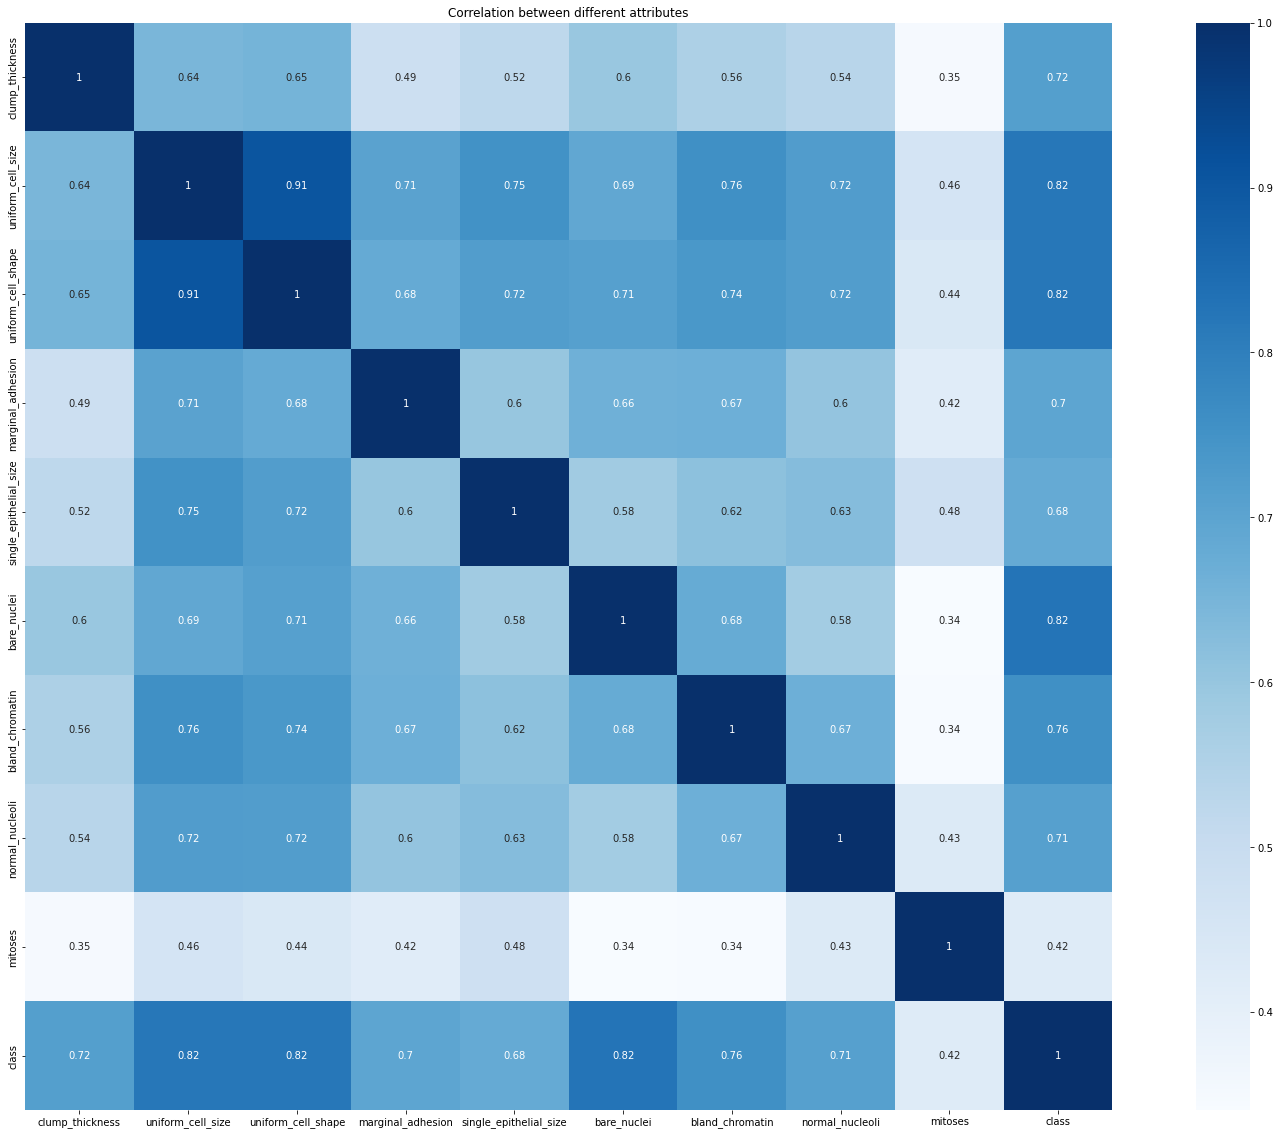

In [30]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

In [31]:
cor_target = abs(cor["class"])
irrelevant_features = cor_target[cor_target<0.5] #%50
irrelevant_features

mitoses    0.42317
Name: class, dtype: float64

In [32]:
del df['mitoses'] #%42
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   clump_thickness         699 non-null    int64
 1   uniform_cell_size       699 non-null    int64
 2   uniform_cell_shape      699 non-null    int64
 3   marginal_adhesion       699 non-null    int64
 4   single_epithelial_size  699 non-null    int64
 5   bare_nuclei             699 non-null    int64
 6   bland_chromatin         699 non-null    int64
 7   normal_nucleoli         699 non-null    int64
 8   class                   699 non-null    int64
dtypes: int64(9)
memory usage: 49.3 KB


In [33]:
Y=df['class'].values
X=df.drop('class',axis=1).values


X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3, random_state=1)

In [34]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


scoring = 'accuracy'
models= []

models.append(('NB', GaussianNB()))
models.append(('SVM', SVC())) 
models.append(('ABC', AdaBoostClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGB', GradientBoostingClassifier()))
models.append(('LR', LogisticRegression()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model:Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(cv_results)
    print(msg)
    print("*******************************************************************")

[0.93877551 0.97959184 0.95918367 0.93877551 0.89795918 1.
 0.95918367 0.97959184 0.95918367 0.9375    ]
For NB Model:Mean accuracy is 0.954974 (Std accuracy is 0.027154)
*******************************************************************
[0.93877551 1.         0.95918367 0.95918367 0.89795918 1.
 0.95918367 0.97959184 0.91836735 0.95833333]
For SVM Model:Mean accuracy is 0.957058 (Std accuracy is 0.030879)
*******************************************************************
[0.93877551 0.97959184 0.97959184 0.95918367 0.89795918 1.
 0.89795918 0.97959184 0.85714286 0.9375    ]
For ABC Model:Mean accuracy is 0.942730 (Std accuracy is 0.043594)
*******************************************************************
[0.93877551 1.         1.         0.95918367 0.89795918 1.
 0.95918367 0.97959184 0.85714286 0.95833333]
For KNN Model:Mean accuracy is 0.955017 (Std accuracy is 0.044518)
*******************************************************************
[0.93877551 1.         0.97959184 0.93877

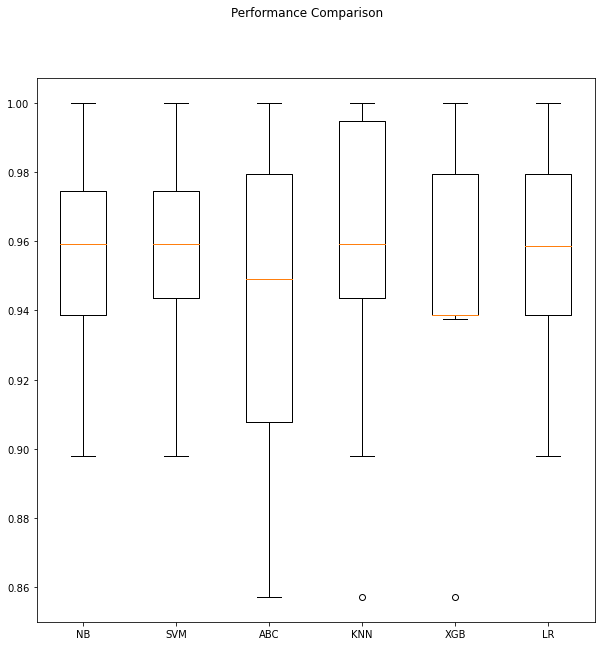

In [35]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



Model: NB
Accuracy score: 0.9761904761904762
Classification report:
               precision    recall  f1-score   support

           2       0.99      0.98      0.98       137
           4       0.96      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.97      0.98      0.97       210
weighted avg       0.98      0.98      0.98       210



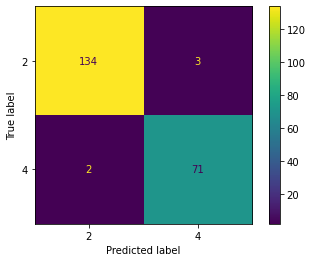


Model: SVM
Accuracy score: 0.9809523809523809
Classification report:
               precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



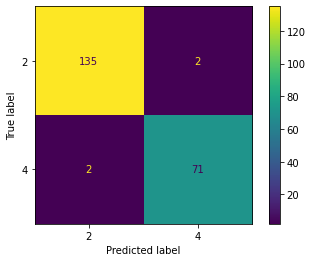


Model: ABC
Accuracy score: 0.9714285714285714
Classification report:
               precision    recall  f1-score   support

           2       0.98      0.98      0.98       137
           4       0.96      0.96      0.96        73

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



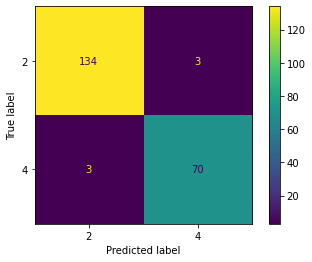


Model: KNN
Accuracy score: 0.9761904761904762
Classification report:
               precision    recall  f1-score   support

           2       0.97      0.99      0.98       137
           4       0.99      0.95      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210



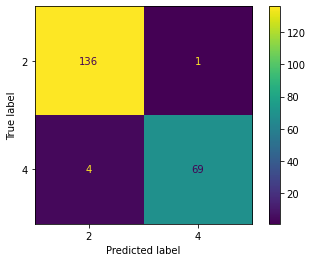


Model: XGB
Accuracy score: 0.9761904761904762
Classification report:
               precision    recall  f1-score   support

           2       0.99      0.98      0.98       137
           4       0.96      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.97      0.98      0.97       210
weighted avg       0.98      0.98      0.98       210



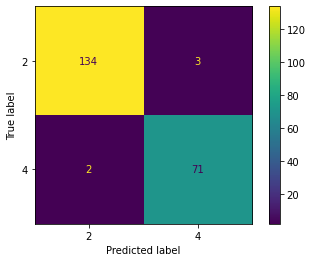


Model: LR
Accuracy score: 0.9666666666666667
Classification report:
               precision    recall  f1-score   support

           2       0.96      0.99      0.97       137
           4       0.99      0.92      0.95        73

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



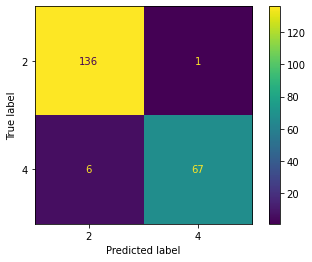

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\nModel:",name)
    print("Accuracy score:",accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))
    cm = confusion_matrix(Y_test, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_) 
    disp.plot()
    plt.show()

In [37]:
clf = SVC() #SVM

clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Test Accuracy:",accuracy)

predict = clf.predict(X_test)
predict

Test Accuracy: 0.9809523809523809


array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2], dtype=int64)

In [38]:
example_measures = [[4,2,1,1,1,2,3,2]]
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [39]:
import pickle
pickle.dump(clf, open('modelSVM.pkl','wb'))

model = pickle.load(open('modelSVM.pkl','rb'))
print(model.predict([[4,2,1,1,1,2,3,2]]))

[2]
